Jadvalda "Marketing Agency" MChJ tomonidan turli OAV larda (TV, Radio, Newspaper) berilgan reklamalar soni va mos keluvchi savdolar (Sales) berilgan.

Sizning vazifangiz:

Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Machine Learning uchun Loyiha qadamlari:

CRISP-DM Metadologiyasi

1-QADAM : BIZNESNI (FAOLIYAT) O'RGANISH

    1-bosqich: Jarayonni tushunish:

         a. Buyurtmachi - "Marketing Agency" MChJ
        Buyurtma - Berilgan turli xil Reklamaning savdo hajmiga turi bo'yicha ta'siri va shu reklama orqali savdo hajmi qaysi reklama asosida ko'payishini aniqlovchi Regression Model tuzish
        Mavjud DataSet - df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
    
         b. Buyurtmachi orqali suhbat:
        Biz yaratgan Regression Model, modelimizning chiqishi boshqa kattaroq modelning kirishiga ulanadi;
        Biz to'plagan DataSet ichidagi hozirgi narx ekspertlar tomonidan aniqlangan;
        Mavjud usulning ya'ni Modelimiz orqali emas, balki ekspertlar chiqargan natija aniqligi qanday? 20%
        (biz yaratgan Model, ekspertlarga to'langan puldan ancha arzon va aniqligi ancha yaxshi chiqishi kerak)
    
    2-bosqich: Analitik yondashuvni aniqlash:

        a. Qaysi Machine Learning turini qo'llaymiz? - Supervised
        b. Muammoning turi (Algorithm) qanday? - Simple Linear Regression
        c. Usul? - Offline 
        d. Modelimiz aniqligini qanday aniqlaymiz? -MAE, RMSE va boshqalar  

2-QADAM : MA'LUMOTLARNI O'RGANISH

    3-bosqich: Ma'lumotlarga qo'yilgan talablar

    4-bosqich: Ma'lumotlarni yig'ish
    
    5-bosqich: Ma'lumotlarni talqin qilish

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
dataset.head()                  

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


3-QADAM: MA'LUMOTLARNI TAYYORLASH

Ma'lumotlarni Vizualizatsiya Qilish

Har bir OAV (TV, Radio, Newspaper) reklama va Sales savdo o‘rtasidagi bog‘liqlikni aniqlash uchun scatter plot chizamiz.

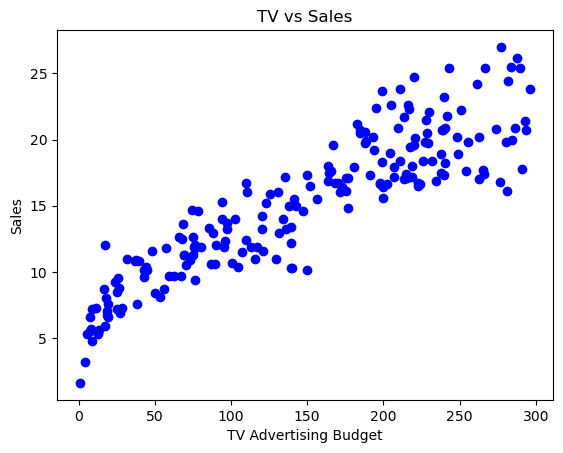

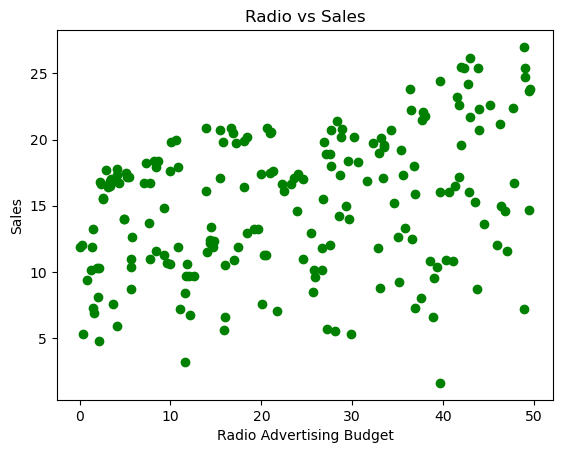

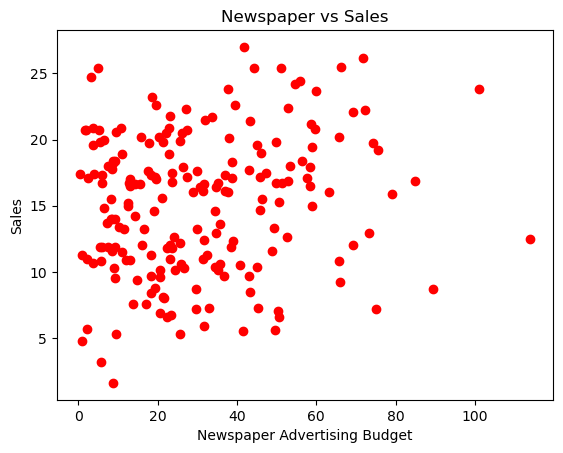

In [8]:
# TV va Sales o'rtasidagi bog'liqlik
plt.scatter(dataset['TV'], dataset['Sales'], label='TV', color='blue')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

# Radio va Sales
plt.scatter(dataset['Radio'], dataset['Sales'], label='Radio', color='green')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()

# Newspaper va Sales
plt.scatter(dataset['Newspaper'], dataset['Sales'], label='Newspaper', color='red')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()

Korrelatsiya Tahlili

Har bir ustun va Sales ustuni o‘rtasidagi korrelatsiya qiymatini aniqlaymiz. Bu orqali qaysi ustun eng kuchli bog‘liqlikka ega ekanligini bilamiz.

In [14]:
correlation = dataset.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [13]:
correlation['Sales'].sort_values(ascending=False)

# tepadagi plot hamda correlation asosida Sales asosan TV orqali reklamaga bog'liq ekan
# shuning uchun Simple Linear Regression Modelimizga X-parametri uchun TV ustunini olamiz

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

4-QADAM: MODELLASH

In [18]:
X = dataset[["TV"]] # ikki tilkaga olinda, sababi df bo'lib chiqishi zarur, bo'lmasa array bo'ladi
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
y = dataset[["Sales"]] # ikki tilkaga olinda, sababi df bo'lib chiqishi zarur, bo'lmasa array bo'ladi
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(180, 1) (20, 1) (180, 1) (20, 1)


In [26]:
from sklearn.linear_model import LinearRegression

SLR_model = LinearRegression()

SLR_model.fit(X_train, y_train)

LinearRegression()


Chiziqli regressiya modeli bilan ishlayotganingizda, quyidagilar modelning asosiy parametrlarini ifodalaydi:

1. Ko‘effitsient (model.coef_)
Bu qiymat x mustaqil o‘zgaruvchi (masalan, TV, Radio) bilan y natijaviy o‘zgaruvchi (masalan, Sales) o‘rtasidagi bog‘liqlik darajasini bildiradi.
Ma'nosi:
model.coef_[0] qiymati 1 birlikka oshganda (TV reklama budjeti), Sales qiymati qanchaga o‘zgarishini ko‘rsatadi.
Masalan, agar model.coef_[0] = 0.05 bo‘lsa, bu:
"TV reklama budjeti 1 birlikka oshsa, Sales qiymati o‘rtacha 0.05 birlikka oshadi" degani.

2. Intercept (model.intercept_)
Bu qiymat, x mustaqil o‘zgaruvchi (masalan, TV) 0 bo‘lganda (hech qanday reklama bo‘lmaganda), y natijaviy o‘zgaruvchi (Sales) qiymatini bildiradi.
Ma'nosi:
Sales qiymati reklamasiz (reklama budjeti 0 bo‘lganda) qancha bo‘lishini ko‘rsatadi.
Masalan, agar model.intercept_ = 5.0 bo‘lsa, bu:
"TV reklama budjeti 0 bo‘lganda, Sales qiymati 5 birlik bo‘ladi" degani.

Umumiy Tenglama
Chiziqli regressiyaning matematik ifodasi quyidagicha:

𝑦=
𝑏
0
+
𝑏
1
⋅
𝑥

Bu yerda:

𝑏
0
b 
0
​
  — Intercept (model.intercept_),
𝑏
1
b 
1
​
  — Ko‘effitsient (model.coef_[0]),
𝑥
x — Mustaqil o‘zgaruvchi (masalan, TV budjeti),
𝑦
y — Bashorat qilingan natija (masalan, Sales).

In [27]:
# Ko‘rsatkichlarni chop etish
print(f"Koeffitsient: {SLR_model.coef_[0]}")
print(f"Intercept: {SLR_model.intercept_}")

Koeffitsient: [0.05666198]
Intercept: [6.75820906]


In [44]:
y_test

,Sales
112,17.1
29,10.5
182,8.7
199,18.4
193,19.6
85,20.2
10,12.6
54,20.2
115,12.6
35,17.8


In [43]:
# Bashorat qilamiz

y_prediction = pd.DataFrame(SLR_model.predict(X_test))
y_prediction

,0
0,16.713718
1,10.758545
2,9.942612
3,19.909454
4,16.209427
5,17.705303
6,10.503566
7,21.643310
8,11.013523
9,23.229846


5-QADAM: MODELNI BAHOLASH

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2_score = r2_score(y_test, y_prediction)

In [60]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2_score}")

MAE: 1.740100062262184
MSE: 4.86572902640963
R²: 0.7581164731353336


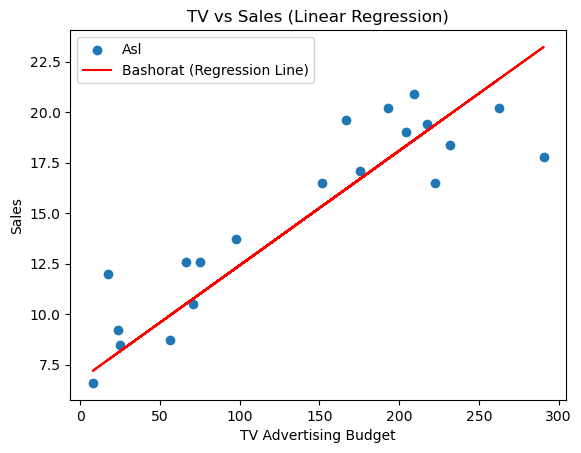

In [61]:
plt.scatter(X_test, y_test, label='Asl')
plt.plot(X_test, y_prediction, color='red', label='Bashorat (Regression Line)')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV vs Sales (Linear Regression)')
plt.legend()
plt.show()

Korrelatsiya tahlili asosida qaysi OAV (TV, Radio, Newspaper) savdolarga eng katta ta’sir qilishini aniqladik.

Ushbu ustun asosida oddiy chiziqli regressiya modeli qurib, savdolarni bashorat qilish uchun ishlatdik.

Modelning samaradorligini baholadik (MAE, MSE, R²).